In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error
import seaborn as sns

C:\Users\karth\anaconda3\envs\mb\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df=df.drop_duplicates()
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [5]:
X = df.iloc[:, : -1]
Y = df.iloc[:, 6]

regions = pd.get_dummies(X['region'], drop_first = True)
X = X.drop('region', axis = 1)
X = pd.concat([X, regions], axis = 1)

smokers = pd.get_dummies(X['smoker'], drop_first = True)
X = X.drop('smoker', axis = 1)
X = pd.concat([X, smokers], axis = 1)

s = pd.get_dummies(X['sex'], drop_first = True)
X = X.drop('sex', axis = 1)
X = pd.concat([X, s], axis = 1)

In [6]:
X.head()

,age,bmi,children,northwest,southeast,southwest,yes,male
0,19,27.900,0,0,0,1,1,0
1,18,33.770,1,0,1,0,0,1
2,28,33.000,3,0,1,0,0,1
3,33,22.705,0,1,0,0,0,1
4,32,28.880,0,1,0,0,0,1


In [7]:
clean_dataset(X)
X.head()

,age,bmi,children,northwest,southeast,southwest,yes,male
0,19,27.900,0,0,0,1,1,0
1,18,33.770,1,0,1,0,0,1
2,28,33.000,3,0,1,0,0,1
3,33,22.705,0,1,0,0,0,1
4,32,28.880,0,1,0,0,0,1


In [8]:
# copy the data
X = X.copy()
  
# apply normalization techniques
for column in X.columns:
    X[column] = X[column] / X[column].abs().max()
    
X.head()

,age,bmi,children,northwest,southeast,southwest,yes,male
0,0.296875,0.525127,0.0,0.0,0.0,1.0,1.0,0.0
1,0.281250,0.635611,0.2,0.0,1.0,0.0,0.0,1.0
2,0.437500,0.621118,0.6,0.0,1.0,0.0,0.0,1.0
3,0.515625,0.427348,0.0,1.0,0.0,0.0,0.0,1.0
4,0.500000,0.543572,0.0,1.0,0.0,0.0,0.0,1.0


In [9]:
# copy the data
Y = Y.copy()
  
# apply normalization techniques
for i in Y:
    Y = Y / Y.abs().max()
    
Y.head()

0    0.264777
1    0.027059
2    0.069773
3    0.344744
4    0.060637
Name: charges, dtype: float64

In [10]:
new_df = pd.concat([X, Y], axis = 1)
new_df.head()

,age,bmi,children,northwest,southeast,southwest,yes,male,charges
0,0.296875,0.525127,0.0,0.0,0.0,1.0,1.0,0.0,0.264777
1,0.281250,0.635611,0.2,0.0,1.0,0.0,0.0,1.0,0.027059
2,0.437500,0.621118,0.6,0.0,1.0,0.0,0.0,1.0,0.069773
3,0.515625,0.427348,0.0,1.0,0.0,0.0,0.0,1.0,0.344744
4,0.500000,0.543572,0.0,1.0,0.0,0.0,0.0,1.0,0.060637


C:\Users\karth\anaconda3\envs\mb\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


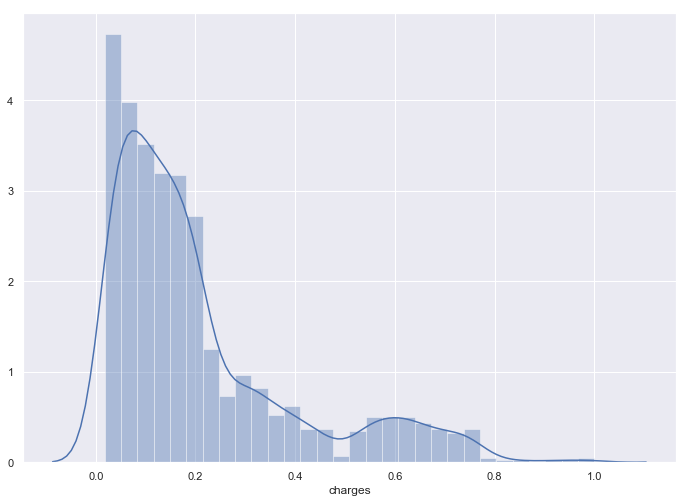

In [11]:
import matplotlib.pyplot as plt 
%matplotlib inline

# EDA
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(new_df['charges'], bins=30)
plt.show()

In [12]:
new_df.drop(new_df.index[list((np.where(new_df['charges'] > 0.2)))],inplace = True)

C:\Users\karth\anaconda3\envs\mb\lib\site-packages\pandas\core\indexes\base.py:2095: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


C:\Users\karth\anaconda3\envs\mb\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


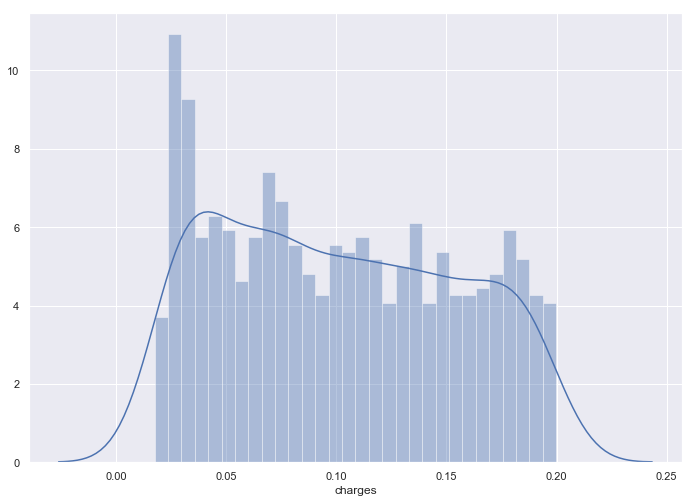

In [13]:
# EDA
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(new_df['charges'], bins=30)
plt.show()

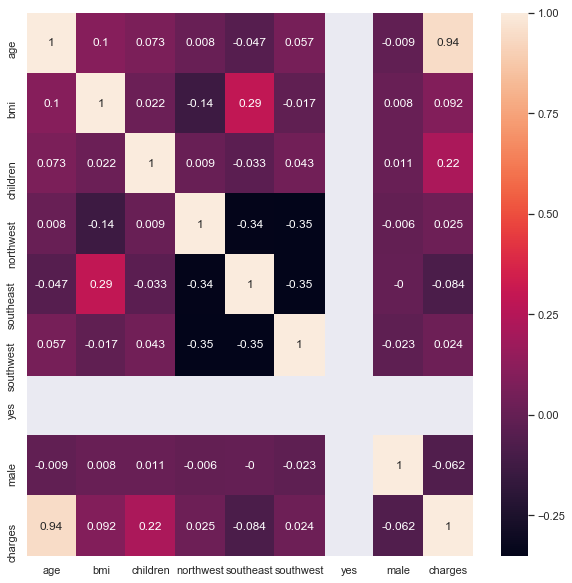

In [14]:
plt.figure(figsize=(10,10))
correlation_matrix = new_df.corr().round(3)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

In [15]:
X = pd.DataFrame(np.c_[new_df['age'], new_df['children'], new_df['yes'], new_df['bmi']], columns = ['age', 'children', 'yes', 'bmi'])
Y = new_df['charges']

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 7)

In [17]:
rfr_model = RandomForestRegressor()
rfr_model.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [18]:
y_train_predict = rfr_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set:")
print("\n")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set:
y_test_predict = rfr_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set:")
print("\n")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set:


RMSE is 0.007275639327135642
R2 score is 0.9816543162355859


The model performance for testing set:


RMSE is 0.013752035279054135
R2 score is 0.9310883541740334


<function matplotlib.pyplot.show(*args, **kw)>

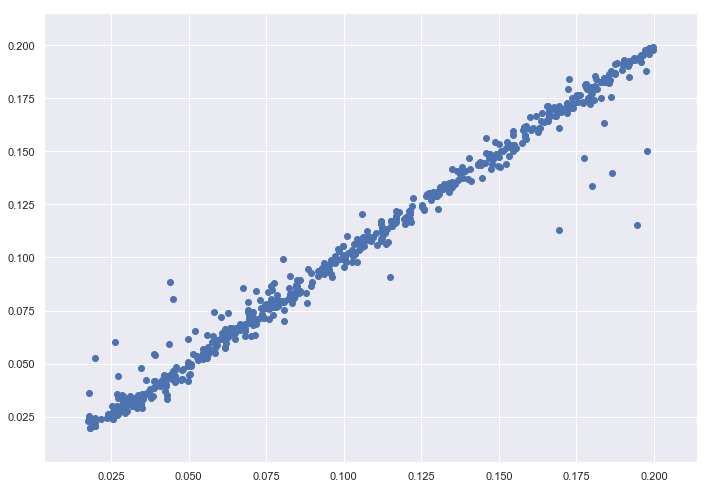

In [19]:
plt.scatter(Y_train,y_train_predict)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

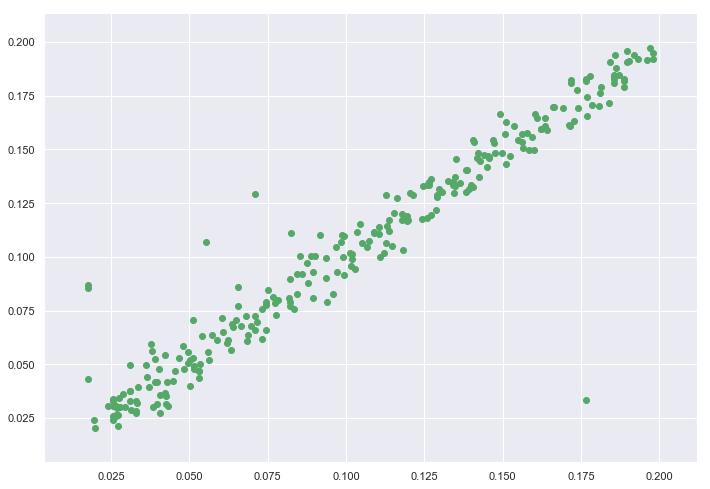

In [20]:
plt.scatter(Y_test,y_test_predict, c = 'g')
plt.show